In [1]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
#from google.colab import drive
#drive.mount('/content/gdrive')
import time
from scipy import io

In [2]:
# Copyright 2019 Google LLC.
# SPDX-License-Identifier: Apache-2.0

# Author: Anton Mikhailov

turbo_colormap_data = [[0.18995,0.07176,0.23217],[0.19483,0.08339,0.26149],[0.19956,0.09498,0.29024],[0.20415,0.10652,0.31844],[0.20860,0.11802,0.34607],[0.21291,0.12947,0.37314],[0.21708,0.14087,0.39964],[0.22111,0.15223,0.42558],[0.22500,0.16354,0.45096],[0.22875,0.17481,0.47578],[0.23236,0.18603,0.50004],[0.23582,0.19720,0.52373],[0.23915,0.20833,0.54686],[0.24234,0.21941,0.56942],[0.24539,0.23044,0.59142],[0.24830,0.24143,0.61286],[0.25107,0.25237,0.63374],[0.25369,0.26327,0.65406],[0.25618,0.27412,0.67381],[0.25853,0.28492,0.69300],[0.26074,0.29568,0.71162],[0.26280,0.30639,0.72968],[0.26473,0.31706,0.74718],[0.26652,0.32768,0.76412],[0.26816,0.33825,0.78050],[0.26967,0.34878,0.79631],[0.27103,0.35926,0.81156],[0.27226,0.36970,0.82624],[0.27334,0.38008,0.84037],[0.27429,0.39043,0.85393],[0.27509,0.40072,0.86692],[0.27576,0.41097,0.87936],[0.27628,0.42118,0.89123],[0.27667,0.43134,0.90254],[0.27691,0.44145,0.91328],[0.27701,0.45152,0.92347],[0.27698,0.46153,0.93309],[0.27680,0.47151,0.94214],[0.27648,0.48144,0.95064],[0.27603,0.49132,0.95857],[0.27543,0.50115,0.96594],[0.27469,0.51094,0.97275],[0.27381,0.52069,0.97899],[0.27273,0.53040,0.98461],[0.27106,0.54015,0.98930],[0.26878,0.54995,0.99303],[0.26592,0.55979,0.99583],[0.26252,0.56967,0.99773],[0.25862,0.57958,0.99876],[0.25425,0.58950,0.99896],[0.24946,0.59943,0.99835],[0.24427,0.60937,0.99697],[0.23874,0.61931,0.99485],[0.23288,0.62923,0.99202],[0.22676,0.63913,0.98851],[0.22039,0.64901,0.98436],[0.21382,0.65886,0.97959],[0.20708,0.66866,0.97423],[0.20021,0.67842,0.96833],[0.19326,0.68812,0.96190],[0.18625,0.69775,0.95498],[0.17923,0.70732,0.94761],[0.17223,0.71680,0.93981],[0.16529,0.72620,0.93161],[0.15844,0.73551,0.92305],[0.15173,0.74472,0.91416],[0.14519,0.75381,0.90496],[0.13886,0.76279,0.89550],[0.13278,0.77165,0.88580],[0.12698,0.78037,0.87590],[0.12151,0.78896,0.86581],[0.11639,0.79740,0.85559],[0.11167,0.80569,0.84525],[0.10738,0.81381,0.83484],[0.10357,0.82177,0.82437],[0.10026,0.82955,0.81389],[0.09750,0.83714,0.80342],[0.09532,0.84455,0.79299],[0.09377,0.85175,0.78264],[0.09287,0.85875,0.77240],[0.09267,0.86554,0.76230],[0.09320,0.87211,0.75237],[0.09451,0.87844,0.74265],[0.09662,0.88454,0.73316],[0.09958,0.89040,0.72393],[0.10342,0.89600,0.71500],[0.10815,0.90142,0.70599],[0.11374,0.90673,0.69651],[0.12014,0.91193,0.68660],[0.12733,0.91701,0.67627],[0.13526,0.92197,0.66556],[0.14391,0.92680,0.65448],[0.15323,0.93151,0.64308],[0.16319,0.93609,0.63137],[0.17377,0.94053,0.61938],[0.18491,0.94484,0.60713],[0.19659,0.94901,0.59466],[0.20877,0.95304,0.58199],[0.22142,0.95692,0.56914],[0.23449,0.96065,0.55614],[0.24797,0.96423,0.54303],[0.26180,0.96765,0.52981],[0.27597,0.97092,0.51653],[0.29042,0.97403,0.50321],[0.30513,0.97697,0.48987],[0.32006,0.97974,0.47654],[0.33517,0.98234,0.46325],[0.35043,0.98477,0.45002],[0.36581,0.98702,0.43688],[0.38127,0.98909,0.42386],[0.39678,0.99098,0.41098],[0.41229,0.99268,0.39826],[0.42778,0.99419,0.38575],[0.44321,0.99551,0.37345],[0.45854,0.99663,0.36140],[0.47375,0.99755,0.34963],[0.48879,0.99828,0.33816],[0.50362,0.99879,0.32701],[0.51822,0.99910,0.31622],[0.53255,0.99919,0.30581],[0.54658,0.99907,0.29581],[0.56026,0.99873,0.28623],[0.57357,0.99817,0.27712],[0.58646,0.99739,0.26849],[0.59891,0.99638,0.26038],[0.61088,0.99514,0.25280],[0.62233,0.99366,0.24579],[0.63323,0.99195,0.23937],[0.64362,0.98999,0.23356],[0.65394,0.98775,0.22835],[0.66428,0.98524,0.22370],[0.67462,0.98246,0.21960],[0.68494,0.97941,0.21602],[0.69525,0.97610,0.21294],[0.70553,0.97255,0.21032],[0.71577,0.96875,0.20815],[0.72596,0.96470,0.20640],[0.73610,0.96043,0.20504],[0.74617,0.95593,0.20406],[0.75617,0.95121,0.20343],[0.76608,0.94627,0.20311],[0.77591,0.94113,0.20310],[0.78563,0.93579,0.20336],[0.79524,0.93025,0.20386],[0.80473,0.92452,0.20459],[0.81410,0.91861,0.20552],[0.82333,0.91253,0.20663],[0.83241,0.90627,0.20788],[0.84133,0.89986,0.20926],[0.85010,0.89328,0.21074],[0.85868,0.88655,0.21230],[0.86709,0.87968,0.21391],[0.87530,0.87267,0.21555],[0.88331,0.86553,0.21719],[0.89112,0.85826,0.21880],[0.89870,0.85087,0.22038],[0.90605,0.84337,0.22188],[0.91317,0.83576,0.22328],[0.92004,0.82806,0.22456],[0.92666,0.82025,0.22570],[0.93301,0.81236,0.22667],[0.93909,0.80439,0.22744],[0.94489,0.79634,0.22800],[0.95039,0.78823,0.22831],[0.95560,0.78005,0.22836],[0.96049,0.77181,0.22811],[0.96507,0.76352,0.22754],[0.96931,0.75519,0.22663],[0.97323,0.74682,0.22536],[0.97679,0.73842,0.22369],[0.98000,0.73000,0.22161],[0.98289,0.72140,0.21918],[0.98549,0.71250,0.21650],[0.98781,0.70330,0.21358],[0.98986,0.69382,0.21043],[0.99163,0.68408,0.20706],[0.99314,0.67408,0.20348],[0.99438,0.66386,0.19971],[0.99535,0.65341,0.19577],[0.99607,0.64277,0.19165],[0.99654,0.63193,0.18738],[0.99675,0.62093,0.18297],[0.99672,0.60977,0.17842],[0.99644,0.59846,0.17376],[0.99593,0.58703,0.16899],[0.99517,0.57549,0.16412],[0.99419,0.56386,0.15918],[0.99297,0.55214,0.15417],[0.99153,0.54036,0.14910],[0.98987,0.52854,0.14398],[0.98799,0.51667,0.13883],[0.98590,0.50479,0.13367],[0.98360,0.49291,0.12849],[0.98108,0.48104,0.12332],[0.97837,0.46920,0.11817],[0.97545,0.45740,0.11305],[0.97234,0.44565,0.10797],[0.96904,0.43399,0.10294],[0.96555,0.42241,0.09798],[0.96187,0.41093,0.09310],[0.95801,0.39958,0.08831],[0.95398,0.38836,0.08362],[0.94977,0.37729,0.07905],[0.94538,0.36638,0.07461],[0.94084,0.35566,0.07031],[0.93612,0.34513,0.06616],[0.93125,0.33482,0.06218],[0.92623,0.32473,0.05837],[0.92105,0.31489,0.05475],[0.91572,0.30530,0.05134],[0.91024,0.29599,0.04814],[0.90463,0.28696,0.04516],[0.89888,0.27824,0.04243],[0.89298,0.26981,0.03993],[0.88691,0.26152,0.03753],[0.88066,0.25334,0.03521],[0.87422,0.24526,0.03297],[0.86760,0.23730,0.03082],[0.86079,0.22945,0.02875],[0.85380,0.22170,0.02677],[0.84662,0.21407,0.02487],[0.83926,0.20654,0.02305],[0.83172,0.19912,0.02131],[0.82399,0.19182,0.01966],[0.81608,0.18462,0.01809],[0.80799,0.17753,0.01660],[0.79971,0.17055,0.01520],[0.79125,0.16368,0.01387],[0.78260,0.15693,0.01264],[0.77377,0.15028,0.01148],[0.76476,0.14374,0.01041],[0.75556,0.13731,0.00942],[0.74617,0.13098,0.00851],[0.73661,0.12477,0.00769],[0.72686,0.11867,0.00695],[0.71692,0.11268,0.00629],[0.70680,0.10680,0.00571],[0.69650,0.10102,0.00522],[0.68602,0.09536,0.00481],[0.67535,0.08980,0.00449],[0.66449,0.08436,0.00424],[0.65345,0.07902,0.00408],[0.64223,0.07380,0.00401],[0.63082,0.06868,0.00401],[0.61923,0.06367,0.00410],[0.60746,0.05878,0.00427],[0.59550,0.05399,0.00453],[0.58336,0.04931,0.00486],[0.57103,0.04474,0.00529],[0.55852,0.04028,0.00579],[0.54583,0.03593,0.00638],[0.53295,0.03169,0.00705],[0.51989,0.02756,0.00780],[0.50664,0.02354,0.00863],[0.49321,0.01963,0.00955],[0.47960,0.01583,0.01055]]

# The look-up table contains 256 entries. Each entry is a floating point sRGB triplet.
# To use it with matplotlib, pass cmap=ListedColormap(turbo_colormap_data) as an arg to imshow() (don't forget "from matplotlib.colors import ListedColormap").
# If you have a typical 8-bit greyscale image, you can use the 8-bit value to index into this LUT directly.
# The floating point color values can be converted to 8-bit sRGB via multiplying by 255 and casting/flooring to an integer. Saturation should not be required for IEEE-754 compliant arithmetic.
# If you have a floating point value in the range [0,1], you can use interpolate() to linearly interpolate between the entries.
# If you have 16-bit or 32-bit integer values, convert them to floating point values on the [0,1] range and then use interpolate(). Doing the interpolation in floating point will reduce banding.
# If some of your values may lie outside the [0,1] range, use interpolate_or_clip() to highlight them.

def interpolate(colormap, x):
  x = max(0.0, min(1.0, x))
  a = int(x*255.0)
  b = min(255, a + 1)
  f = x*255.0 - a
  return [colormap[a][0] + (colormap[b][0] - colormap[a][0]) * f,
          colormap[a][1] + (colormap[b][1] - colormap[a][1]) * f,
          colormap[a][2] + (colormap[b][2] - colormap[a][2]) * f]

def interpolate_or_clip(colormap, x):
  if   x < 0.0: return [0.0, 0.0, 0.0]
  elif x > 1.0: return [1.0, 1.0, 1.0]
  else: return interpolate(colormap, x)

In [3]:
import matplotlib.cm
from matplotlib.colors import ListedColormap
matplotlib.cm.register_cmap('turbo', cmap=ListedColormap(turbo_colormap_data))

In [4]:
##ONLY RUN ONCE

# loaded = io.loadmat('clouds/2D_zeroPadaed_clouds_orig.mat')
# total_clouds = [value for key, value in loaded.items() if key.startswith("cloud_")]
# clouds = [cloud for cloud in total_clouds if (np.count_nonzero(cloud) > 200)] #remove clouds that are nearly empty
# print(total_clouds[0].shape)
# print("Number of total clouds: " + str(len(total_clouds))) 
# print("Number of non-empty clouds: " + str(len(clouds)))
# tensor_clouds = torch.Tensor(clouds) # transform to torch tensor
# tensor_clouds = tensor_clouds.unsqueeze(1)

# # Create the dataset
# dataset = torch.utils.data.TensorDataset(tensor_clouds)

# train_size = int(0.9 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
# torch.save(train_dataset, os.path.join(os.getcwd() + '/dataset' , 'train.pt'))
# torch.save(test_dataset, os.path.join(os.getcwd() + '/dataset' , 'test.pt'))

In [5]:
# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [6]:
# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 64

# Number of channels in the training images. For color images this is 3
nc = 1

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Number of training epochs
num_epochs = 200

# Learning rate for optimizers
g_lr = 0.0001
d_lr = 0.0001

# Beta1 hyperparam for Adam optimizers (a larger number (up to 1) means we take more previous gradients into consideration)
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

# Multiplier for the MSE error portion of the total generator error
alpha = 1

# From Wasserstein GAN (2017), the number of iterations we only update the Discriminator
n_critic = 5
LAMBDA = 10

# Layer depth:
Gdepth = [512, 256, 128, 64, 32]
Ddepth = [16, 32, 64, 128, 256]

torch.Size([64, 1, 130, 80])


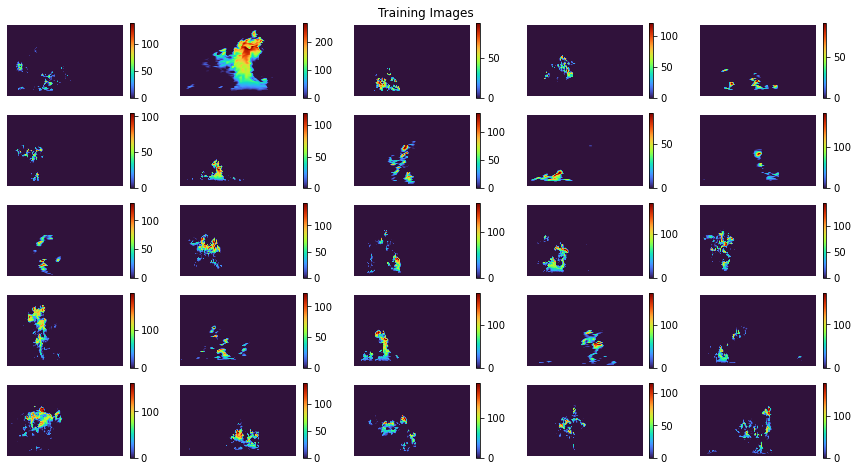

In [15]:
train_dataset = torch.load(os.path.join(os.getcwd() + '/dataset' , 'train.pt'))

# Create the dataloader
dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size,
                                         num_workers=workers)
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
print(real_batch[0].shape)


fig=plt.figure(figsize=(15, 8))
plt.title("Training Images")
plt.axis("off")
columns = 5
rows = 5

for i in range(1, columns*rows +1):
    img = np.squeeze(real_batch[0][i-1])
    img = np.rot90(img)
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    a = plt.imshow(img, cmap='turbo', interpolation='nearest')
    fig.colorbar(a)


plt.show()
fig.tight_layout()

In [8]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        #0.0, 0.02
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [9]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, Gdepth[0], (4, 3), 1, (0,0), bias=False),
            nn.BatchNorm2d(Gdepth[0]),
            nn.ReLU(True),
            # state size. (ngf*16) x 4 x 4
            nn.ConvTranspose2d( Gdepth[0], Gdepth[1], (4, 3), 2, 1, bias=False),
            nn.BatchNorm2d(Gdepth[1]),
            nn.ReLU(True),
            # state size. (ngf*8) x 8 x 8
            nn.ConvTranspose2d(Gdepth[1], Gdepth[2], (4, 4), 2, 1, bias=False),
            nn.BatchNorm2d(Gdepth[2]),
            nn.ReLU(True),
            # state size. (ngf*4) x 16 x 16
            
            nn.ConvTranspose2d(Gdepth[2], Gdepth[3], (4, 4), 2, 1, bias=False),
            nn.BatchNorm2d(Gdepth[3]),
            nn.ReLU(True),
            # state size. (ngf*4) x 32 x 32
            nn.ConvTranspose2d(Gdepth[3], Gdepth[4], (4, 4), 2, 1, bias=False),
            nn.BatchNorm2d(Gdepth[4]),
            nn.ReLU(True),
            # state size. (ngf*4) x 64 x 64
            nn.ConvTranspose2d( Gdepth[4] , nc, (4, 4), 2, (0, 1), bias=False),
            nn.ReLU(True),
        )

    def forward(self, input):
        return self.main(input)

In [10]:
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): BatchNorm2d(

In [11]:
#calculate the number of parameters in the models
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Generator parameter count: ' + str(f'{count_parameters(netG):,}'))

Generator parameter count: 2,877,888


201


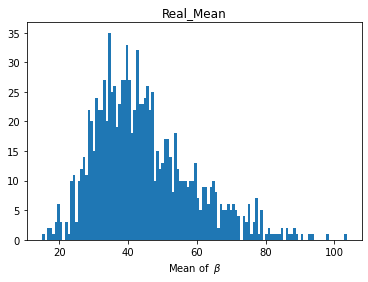

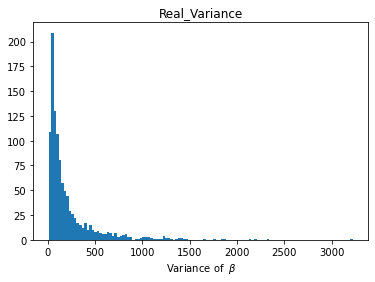

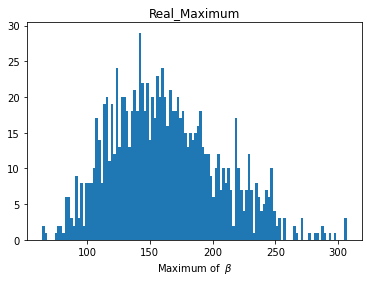

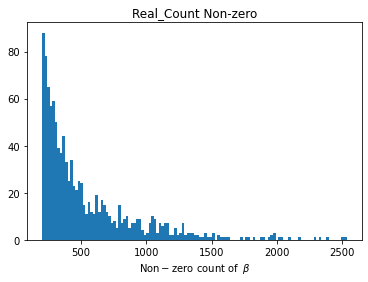

In [12]:
test_dataset = torch.load(os.path.join(os.getcwd() + '/dataset' , 'test.pt'))
test_size = len(test_dataset)
test_size = test_size - (test_size%batch_size)

mean_real = []
var_real = []
max_real = []
non_zero_count_real = []
for i in range(test_size):
    mean_real.append(((torch.sum(test_dataset[i][0])/torch.count_nonzero(test_dataset[i][0]))))
    var_real.append(torch.var(test_dataset[i][0]))
    max_real.append(torch.max(test_dataset[i][0]))
    non_zero_count_real.append(torch.count_nonzero(test_dataset[i][0]))
    
mean_real = torch.stack(mean_real).numpy()
var_real = torch.stack(var_real).numpy()
max_real = torch.stack(max_real).numpy()
non_zero_count_real = torch.stack(non_zero_count_real).numpy()


print(np.amin(non_zero_count_real, axis=0))
plt.hist(mean_real, bins = 120)
plt.title('Real_Mean')
plt.xlabel(r'$\mathrm{Mean\ of\:}\ \beta$')
plt.show()
plt.hist(var_real, bins = 120)
plt.title('Real_Variance')
plt.xlabel(r'$\mathrm{Variance\ of\:}\ \beta$')
plt.show()
plt.hist(max_real, bins = 120)
plt.title('Real_Maximum')
plt.xlabel(r'$\mathrm{Maximum\ of\:}\ \beta$')
plt.show()
plt.hist(non_zero_count_real, bins = 120)
plt.title('Real_Count Non-zero')
plt.xlabel(r'$\mathrm{Non-zero\ count\ of\:}\ \beta$')
plt.show()

In [13]:


def compare_stats(model_num):
    #load generator
    #test_netG = netG
    test_netG = Generator(ngpu).to(device)
    test_netG.load_state_dict(torch.load('WGAN_prio/G-{}.pt'.format(model_num)))
    test_netG.eval()
    #generate fake clouds
    fake_clouds_for_test = []
    tmp_test_size = test_size
    while tmp_test_size > batch_size:
        tmp_test_size = tmp_test_size - batch_size
        fixed_noise_for_test = torch.randn(batch_size, nz, 1, 1, device=device)
        with torch.no_grad():
            fake_clouds_for_test.append(test_netG(fixed_noise_for_test).detach().cpu())
    fixed_noise_for_test = torch.randn(tmp_test_size, nz, 1, 1, device=device)
    with torch.no_grad():
        fake_clouds_for_test.append(test_netG(fixed_noise_for_test).detach().cpu())
        
    #concat them
    fake_concat = fake_clouds_for_test[0]
    n = 0
    for element in fake_clouds_for_test:
        if n>0 :
            fake_concat = torch.cat((fake_concat, element), 0)
        n = n +1

    mean_fake = []
    var_fake = []
    max_fake = []
    non_zero_count_fake = []
    for i in range(len(fake_concat)):
        mean_fake.append(((torch.sum(fake_concat[i][0])/torch.count_nonzero(fake_concat[i][0]))))
        var_fake.append(torch.var(fake_concat[i][0]))
        max_fake.append(torch.max(fake_concat[i][0]))
        non_zero_count_fake.append(torch.count_nonzero(fake_concat[i][0]))

    mean_fake = torch.stack(mean_fake).numpy()
    var_fake = torch.stack(var_fake).numpy()
    max_fake = torch.stack(max_fake).numpy()
    non_zero_count_fake = torch.stack(non_zero_count_fake).numpy()
    
    
    fig, ax = plt.subplots(1, 2)
    ax[0].hist(mean_fake, bins = 120, alpha = 0.5, label='Fake')
    ax[0].hist(mean_real, bins = 120, alpha = 0.5, label='Real')
    ax[0].legend(loc='upper right')
    ax[0].set_title('Mean')
    ax[0].set_xlabel(r'$\mathrm{Mean\ of\:}\ \beta$')
    fig.set_figwidth(15)
    ax[1].hist(mean_fake, bins = 120)
    ax[1].set_title('Fake only')
    ax[1].set_xlabel(r'$\mathrm{Mean\ of\:}\ \beta$')
    plt.show()
    
    fig, ax = plt.subplots(1, 2)
    ax[0].hist(var_fake, bins = 120, alpha = 0.5, label='Fake')
    ax[0].hist(var_real, bins = 120, alpha = 0.5, label='Real')
    ax[0].legend(loc='upper right')
    ax[0].set_title('Variance')
    ax[0].set_xlabel(r'$\mathrm{Variance\ of\:}\ \beta$')
    fig.set_figwidth(15)
    ax[1].hist(var_fake, bins = 120)
    ax[1].set_title('Fake only')
    ax[1].set_xlabel(r'$\mathrm{Variance\ of\:}\ \beta$')
    plt.show()
    
    fig, ax = plt.subplots(1, 2)
    ax[0].hist(max_fake, bins = 120, alpha = 0.5, label='Fake')
    ax[0].hist(max_real, bins = 120, alpha = 0.5, label='Real')
    ax[0].legend(loc='upper right')
    ax[0].set_title('Maximum')
    ax[0].set_xlabel(r'$\mathrm{Maximum\ of\:}\ \beta$')
    fig.set_figwidth(15)
    ax[1].hist(max_fake, bins = 120)
    ax[1].set_title('Fake only')
    ax[1].set_xlabel(r'$\mathrm{Maximum\ of\:}\ \beta$')
    plt.show()
    
    fig, ax = plt.subplots(1, 2)
    ax[0].hist(non_zero_count_fake, bins = 120, alpha = 0.5, label='Fake')
    ax[0].hist(non_zero_count_real, bins = 120, alpha = 0.5, label='Real')
    ax[0].legend(loc='upper right')
    ax[0].set_title('Non-zero count')
    ax[0].set_xlabel(r'$\mathrm{Non-zero\ count\ of\:}\ \beta$')
    fig.set_figwidth(15)
    ax[1].hist(non_zero_count_fake, bins = 120)
    ax[1].set_title('Fake only')
    ax[1].set_xlabel(r'$\mathrm{Non-zero\ count\ of\:}\ \beta$')
    plt.show()
    
    #Show images
    fig=plt.figure(figsize=(15, 8))
    plt.axis("off")
    columns = 5
    rows = 5

    for i in range(1, columns*rows +1):
        img = np.squeeze(fake_clouds_for_test[0][i-1])
        img = np.rot90(img)
        fig.add_subplot(rows, columns, i)
        plt.axis("off")
        a = plt.imshow(img, cmap='turbo', interpolation='nearest')
        fig.colorbar(a)


    plt.show()
    fig.tight_layout()


***********************************************
epoch:199
***********************************************


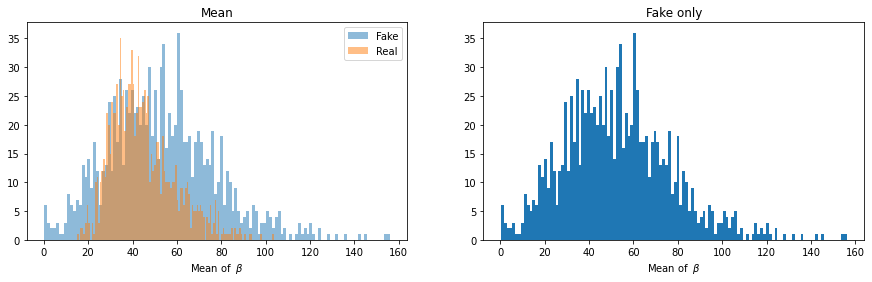

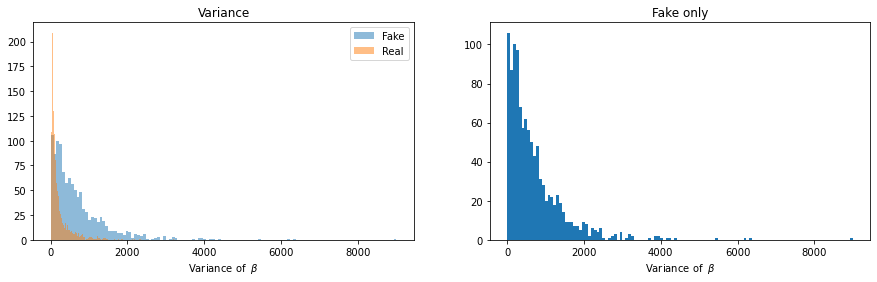

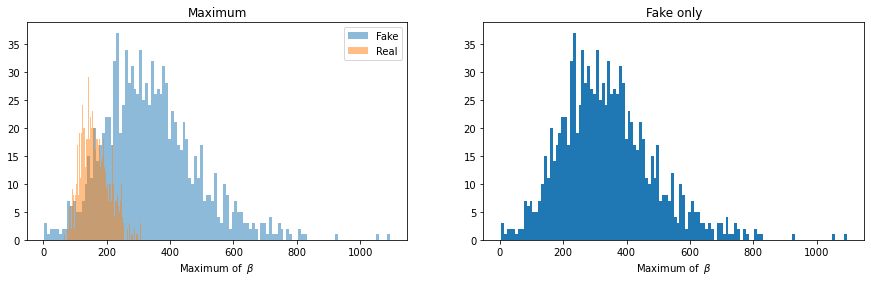

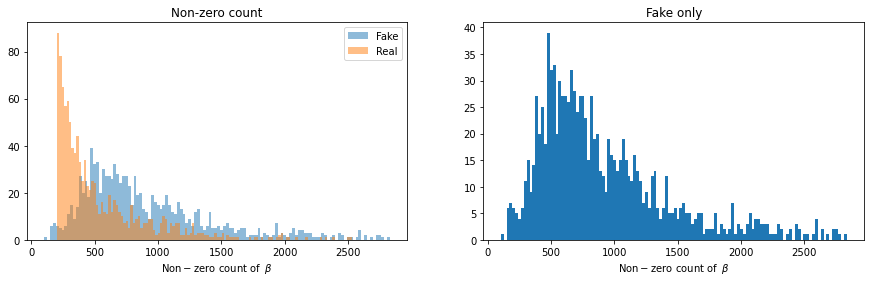

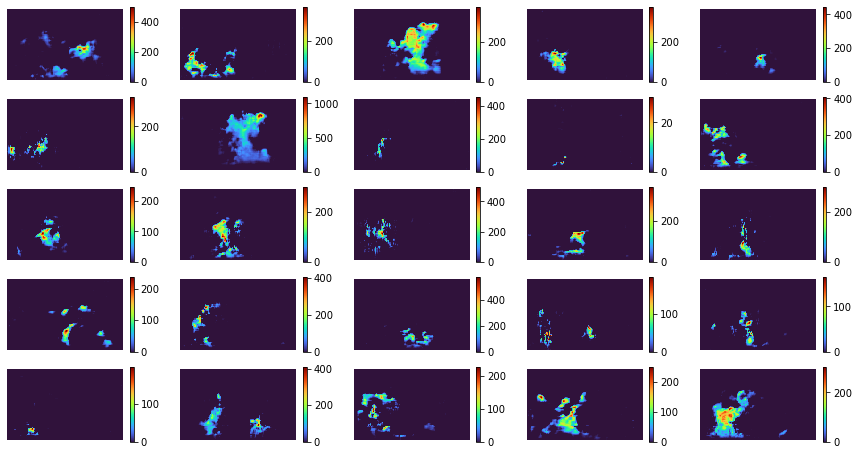

In [18]:
for i in range(199,200):
    print('***********************************************')
    print('epoch:' + str(i))
    print('***********************************************')
    compare_stats(i)